# Tokenization

Load the text "The Time Machine" by H.G. Wells from your txt-file into a string variable.

In [1]:
file = open("35-0.txt", "r")
text = file.read()

## Familiarize with NLTK 
- install it into your environment
- find the methods word_tokenize and sent_tokenize
- your will realize that you need to do more installation steps on the first use

Warmup 
- Subdivide the text into sentences using the nltk.sent_tokenize method.
- Compare the sentences to those you have found manually using regex.
- Subdivide the text into words.
- Repeat the sentence tokenization with the text completely switched to lower case. What do you recognize? 


In [2]:
import nltk
nltk.download('punkt', download_dir='../NLTK_Data')
nltk.data.path.append('../NLTK_Data')

[nltk_data] Downloading package punkt to ../NLTK_Data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
normal_case_words = nltk.tokenize.word_tokenize(text)
lower_case_words = nltk.tokenize.word_tokenize(text.lower())
upper_case_words = nltk.tokenize.word_tokenize(text.upper())
print("Lower Case Words: {} \nNormal Case Words: {} \nUpper Case Words: {}".format(lower_case_words.__len__(), normal_case_words.__len__(), upper_case_words.__len__()))

Lower Case Words: 41031 
Normal Case Words: 41040 
Upper Case Words: 41045


In [4]:
lower_case_sent = nltk.tokenize.sent_tokenize(text.lower())
normal_case_sent = nltk.tokenize.sent_tokenize(text)
upper_case_sent = nltk.tokenize.sent_tokenize(text.upper())
print("Lower Case Sentences: {} \nNormal Case Sentences: {} \nUpper Case Sentences: {}".format(lower_case_sent.__len__(), normal_case_sent.__len__(), upper_case_sent.__len__()))

Lower Case Sentences: 1932 
Normal Case Sentences: 1942 
Upper Case Sentences: 1947


A little bit of analysis!

Which sentences are different in sent_lower (don't forget to add the lower case transformation!)

In [5]:
#Convert word lists to lower case
normal_case_words = list(map(str.lower, normal_case_words))
upper_case_words = list(map(str.lower, upper_case_words))

#Convert sentence lists to lower case
normal_case_sent = list(map(str.lower, normal_case_sent))
upper_case_sent = list(map(str.lower, upper_case_sent))

In [6]:
def listDifference(list1, list2):
    temp = []
    for element in list1:
        if element not in list2:
            temp.append(element)
    return temp

In [7]:
word_diff_lower_normal = listDifference(lower_case_words, normal_case_words)
word_diff_lower_upper = listDifference(lower_case_words, upper_case_words)
word_diff_normal_upper = listDifference(normal_case_words, upper_case_words)

sent_diff_lower_normal = listDifference(lower_case_sent, normal_case_sent)
sent_diff_lower_upper = listDifference(lower_case_sent, upper_case_sent)
sent_diff_normal_upper = listDifference(normal_case_sent, upper_case_sent)

In [8]:
print("Difference lower case to normal case words: {} \nDifference lower case to upper case words: {} \nDifference normal case to upper case words: {}".format(word_diff_lower_normal.__len__(), word_diff_lower_upper.__len__(), word_diff_normal_upper.__len__()))

Difference lower case to normal case words: 9 
Difference lower case to upper case words: 9 
Difference normal case to upper case words: 0


In [9]:
print("Difference lower case to normal case sentences: {} \nDifference lower case to upper case sentences: {} \nDifference normal case to upper case sentences: {}".format(sent_diff_lower_normal.__len__(), sent_diff_lower_upper.__len__(), sent_diff_normal_upper.__len__()))

Difference lower case to normal case sentences: 9 
Difference lower case to upper case sentences: 14 
Difference normal case to upper case sentences: 5


Within the first couple of sentences you already find one case where the sentence tokenization deviates for lower case and normal text. Comment on your finding.

**Homework**: Compare the sentences found by nltk.sent_tokenize to your manually found sentences from the previous notebook. 

## Word tokenization

Use the NLTK word tokenizer. 
- First, familiarize how it handles special situations like those mentioned in the lecture: ellipsis, IP addresses, decimal numbers, clitic contractions and others you are thinking of. Create a text containing all these things and tokenize it.

- Use the NLTK word_tokenize function to subdivide The Time Machine into words.
- Tokenize The Time Machine using a regex-based word tokenizer. Compare the results by counting occurrences of words in both versions and comparing the counts. 


In [10]:
#TODO

### Wordcloud
A good visualization of texts is the so-called word cloud. 
It shows all words that occur but with different text sizes depending on the number of occurrences. 

- Create a word cloud for The Time Machine
- Install (if not already done) WordCloud Python-Package first and plot your results with matplotlib (imshow function)

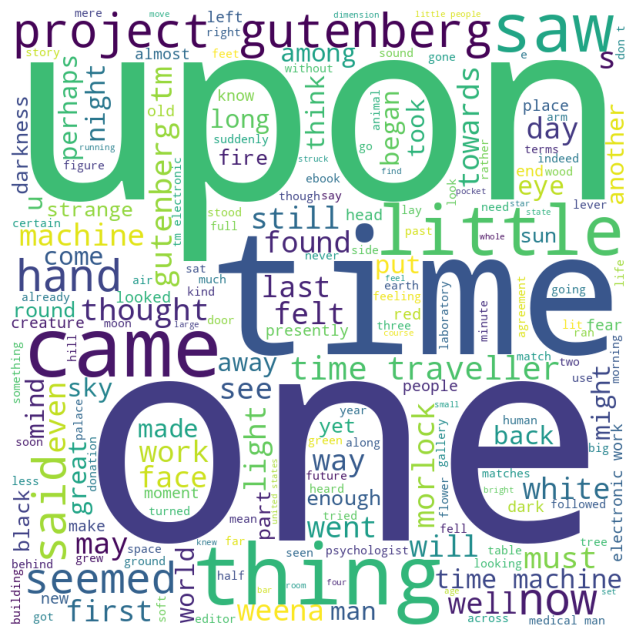

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud_words = ""
wordcloud_words += " ".join(lower_case_words)+ " "
wordcloud = WordCloud(width = 800, height = 800, background_color= 'white', stopwords = STOPWORDS, min_font_size = 10).generate(wordcloud_words)

plt.figure(figsize=(8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

## Lemmatization

- Perform lemmatization on The Time Machine. Use the 
    - Porter stemmer
    - Lancester stemmer
    - WordNet lemmatizer

- Compare your results with the original text.
- For all word stems created by the Porter stemmer, which are not included in the stems from Lancaster find the most similar stem by considering the edit distance (use NLTK).


In [12]:
import nltk
nltk.download('wordnet', download_dir='../NLTK_Data')
nltk.data.path.append('../NLTK_Data')


[nltk_data] Downloading package wordnet to ../NLTK_Data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

wordNet = WordNetLemmatizer()
lancasterStemmer = LancasterStemmer()
porterStemmer = PorterStemmer()

tokens = word_tokenize(text)
wordnet_lemmatized = set()
porter_lemmatized = set()
lancaster_lemmatized = set()

for token in tokens:
    wordnet_word = wordNet.lemmatize(token)
    wordnet_lemmatized.add(wordnet_word)
    
    porter_word = porterStemmer.stem(token)
    porter_lemmatized.add(porter_word)
    
    lancaster_word = lancasterStemmer.stem(token)
    lancaster_lemmatized.add(lancaster_word)


In [14]:
porter_lemmatized.__len__()

4045

In [15]:
wordnet_lemmatized.__len__()

5348

In [16]:
lancaster_lemmatized.__len__()

3618

In [25]:
from nltk.metrics.distance import edit_distance

mostsimilar = []
for porter in porter_lemmatized:
    if porter not in lancaster_lemmatized:
        dist = 1000
        for lancaster in lancaster_lemmatized:
            word_dist = edit_distance(porter, lancaster)
            if word_dist < dist:
                dist = word_dist
                mostsimilar.append([porter, lancaster])

In [23]:
mostsimilar

{('aluminium', 'alumin'),
 ('poor—i', 'perceiv'),
 ('elabor', 'ape-lik'),
 ('maximum', 'maxim'),
 ('gesticul', 'difficul'),
 ('dimli', 'ape-lik'),
 ('clamber', 'char'),
 ('hungri', 'hung'),
 ('have', 'hart'),
 ('easi', 'ape-lik'),
 ('lemur', 'remot'),
 ('queer', 'ape-lik'),
 ('changed—melt', 'caught'),
 ('delicate-mind', 'ape-lik'),
 ('except', 'ape-lik'),
 ('brighter', 'myst'),
 ('fall', 'nam'),
 ('stratif', 'strain'),
 ('home', 'ape-lik'),
 ('warranti', 'asham'),
 ('machine-read', 'machinery'),
 ('similarli', 'simil'),
 ('brilliantli', 'built'),
 ('vase', 'vast'),
 ('sleepi', 'ape-lik'),
 ('eke', 'ape-lik'),
 ('swiftli', 'built'),
 ('immedi', 'inherit'),
 ('mutual', 'ape-lik'),
 ('dinner', 'myst'),
 ('watchett', 'watchet'),
 ('grace', 'grant'),
 ('stone', 'strong'),
 ('galleri', 'inherit'),
 ('whimper', 'ape-lik'),
 ('grace', 'ape-lik'),
 ('geometr', 'geomet'),
 ('somewhat', 'somehow'),
 ('true', 'tre'),
 ('habitu', 'rath'),
 ('exhilar', 'exhil'),
 ('tale', 'ape-lik'),
 ('wore', 'hor